<a href="https://colab.research.google.com/github/riyab22/UdemyJava/blob/main/Airbnb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**

1.   Data Acquisition and Cleaning
2.   Feature Selection
3.   Exploratory Data Analysis (EDA)
4.   Linear Regression Model
5.   Random Forest Regression
6.   XGBoost
7.   Artificial NeuralNetwork
8.   Textual analysis
9.   Conclusion




# **Step 1: Dataset Introduction**

**Data Source**

The dataset used in this project is from Airbnb listings, providing various details like accommodates, bathrooms, bedrooms, minimum_nights, review_scores_rating, review_scores_value, and price

**Loading Data:**

The data is loaded into a Pandas DataFrame for manipulation and analysis.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.inspection import permutation_importance
import itertools
from collections import Counter
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import ast


# Load the dataset

# import Boston listing datasets
reviews_url = 'https://data.insideairbnb.com/united-states/ma/boston/2024-06-22/data/listings.csv.gz'

# Load the datasets into DataFrames
dataset = pd.read_csv(reviews_url, compression='gzip')

# Display the first few rows of the dataset
dataset.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20240622024514,2024-06-22,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.84,4.88,NaN,f,1,1,0,0,0.23
1,5506,https://www.airbnb.com/rooms/5506,20240622024514,2024-06-22,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.89,4.56,4.75,STR-490093,f,10,10,0,0,0.66
2,6695,https://www.airbnb.com/rooms/6695,20240622024514,2024-06-22,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.95,4.52,4.72,STR-491702,f,10,10,0,0,0.71
3,8789,https://www.airbnb.com/rooms/8789,20240622024514,2024-06-22,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.97,4.97,4.59,NaN,f,8,8,0,0,0.24
4,10811,https://www.airbnb.com/rooms/10811,20240622024514,2024-06-22,city scrape,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",Stunning Back Bay furnished studio apartment. ...,A one-square mile neighborhood that is arguabl...,https://a0.muscache.com/pictures/45735/27548f7...,38997,...,4.00,5.00,4.67,NaN,f,13,13,0,0,0.09


In [ ]:
dataset.shape

(4325, 75)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4325 non-null   int64  
 1   listing_url                                   4325 non-null   object 
 2   scrape_id                                     4325 non-null   int64  
 3   last_scraped                                  4325 non-null   object 
 4   source                                        4325 non-null   object 
 5   name                                          4325 non-null   object 
 6   description                                   4229 non-null   object 
 7   neighborhood_overview                         2739 non-null   object 
 8   picture_url                                   4325 non-null   object 
 9   host_id                                       4325 non-null   i

In the given dataset for the Boston listings, we have 75 features. We want to further split the data into categorical and numerical variables.

In [ ]:
# Function to identify which of the columns are numerical and which are categorical
def categorize_features(df):

    numerical_features = []
    categorical_features = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_features.append(col)
        else:
            categorical_features.append(col)

    return numerical_features, categorical_features

In [ ]:
numerical, categorical = categorize_features(dataset)

print("Numerical Features:", numerical)
print("Categorical Features:", categorical)

Numerical Features: ['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Categorical Features: ['listing_url', 'last_scrap

Some of the textual data such as the URLs cannot be used as it is for the analysis, hence dropping them.

In [ ]:
# Removing irrelevant numerical and categorical data
dataset = dataset.drop(['latitude', 'longitude', 'id', 'host_id', 'scrape_id', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)
# removing similar features such as calculated host listings and host listings
dataset = dataset.drop(['host_listings_count','calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)
# Removing similar values such as the reviews in last 30 days or more
dataset = dataset.drop(['number_of_reviews_ltm', 'number_of_reviews_l30d'], axis=1)
# Removing similar values such as availability for 30, 60, 90 days
dataset = dataset.drop(['availability_30', 'availability_60', 'availability_90'], axis=1)
dataset = dataset.drop(['listing_url', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'neighbourhood_cleansed','calendar_last_scraped','picture_url', 'host_url', 'host_name','host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood', 'first_review', 'last_review', 'bathrooms_text'], axis=1)

In [ ]:
numerical, categorical = categorize_features(dataset)

print("Numerical Features:", numerical)
print("Categorical Features:", categorical)
print(f"Number of numerical features: {len(numerical)}")
print(f"Number of categorical features: {len(categorical)}")

Numerical Features: ['host_total_listings_count', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
Categorical Features: ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'amenities', 'price', 'has_availability', 'license', 'instant_bookable']
Number of numerical features: 19
Number of categorical features: 14


Since there are 19 Numerical and 14 Categorical variables, we have 33 dimensions for this dataset. This can induce complexity in training and testing. Hence we need to search for best features to continue data exploration and analysis.

In [ ]:
dataset[categorical].head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,property_type,room_type,amenities,price,has_availability,license,instant_bookable
0,within a day,80%,33%,t,"['email', 'phone']",t,f,Entire rental unit,Entire home/apt,"[""Central air conditioning"", ""Free street park...",$125.00,t,NaN,f
1,within an hour,100%,99%,t,"['email', 'phone']",t,t,Entire guest suite,Entire home/apt,"[""Fire extinguisher"", ""Free street parking"", ""...",$139.00,t,STR-490093,f
2,within an hour,100%,99%,t,"['email', 'phone']",t,t,Entire condo,Entire home/apt,"[""Fire extinguisher"", ""Free street parking"", ""...",$179.00,t,STR-491702,f
3,within an hour,100%,46%,t,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$92.00,t,NaN,f
4,within a day,98%,57%,f,"['email', 'phone']",t,t,Entire rental unit,Entire home/apt,"[""Fire extinguisher"", ""Bed linens"", ""Long term...",$130.00,t,NaN,f


In [ ]:
# Encoding some of the columns with rates in percentages to numerical values
dataset['host_response_rate'] = pd.to_numeric(dataset['host_response_rate'].str.rstrip('%'), errors='coerce')
dataset['host_acceptance_rate'] = pd.to_numeric(dataset['host_acceptance_rate'].str.rstrip('%'), errors='coerce')


In [ ]:
# Converting columns with true or false values into 0 and 1
dataset['host_is_superhost'] = dataset['host_is_superhost'].replace({'t': 1, 'f': 0})
dataset['host_has_profile_pic'] = dataset['host_has_profile_pic'].replace({'t': 1, 'f': 0})
dataset['host_identity_verified'] = dataset['host_identity_verified'].replace({'t': 1, 'f': 0})
dataset['instant_bookable'] = dataset['instant_bookable'].replace({'t': 1, 'f': 0})
dataset['has_availability'] = dataset['has_availability'].replace({'t': 1, 'f':0})
dataset['license'] = dataset['license'].notna().astype(int)

<ipython-input-110-cb2cc906c830>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['host_is_superhost'] = dataset['host_is_superhost'].replace({'t': 1, 'f': 0})
<ipython-input-110-cb2cc906c830>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['host_has_profile_pic'] = dataset['host_has_profile_pic'].replace({'t': 1, 'f': 0})
<ipython-input-110-cb2cc906c830>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

In [ ]:
numerical, categorical = categorize_features(dataset)

print("Numerical Features:", numerical)
print("Categorical Features:", categorical)
print(f"Number of numerical features: {len(numerical)}")
print(f"Number of categorical features: {len(categorical)}")

Numerical Features: ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'reviews_per_month']
Categorical Features: ['host_response_time', 'host_verifications', 'property_type', 'room_type', 'amenities', 'price']
Number of numerical features: 27
Number of categorical features: 6


In [ ]:
dataset = pd.get_dummies(dataset, columns=['room_type', 'host_response_time'], drop_first=True)

In [ ]:
# Replacing true and false values in dummies to numerical values
dataset['room_type_Hotel room'] = dataset['room_type_Hotel room'].replace({True: 1, False: 0})
dataset['room_type_Private room'] = dataset['room_type_Private room'].replace({True: 1, False: 0})
dataset['room_type_Shared room'] = dataset['room_type_Shared room'].replace({True: 1, False: 0})
dataset['host_response_time_within an hour'] = dataset['host_response_time_within an hour'].replace({True: 1, False: 0})
dataset['host_response_time_within a few hours'] = dataset['host_response_time_within a few hours'].replace({True: 1, False: 0})
dataset['host_response_time_within a day'] = dataset['host_response_time_within a day'].replace({True: 1, False: 0})
dataset.head()

<ipython-input-113-911ea56d0503>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['room_type_Hotel room'] = dataset['room_type_Hotel room'].replace({True: 1, False: 0})
<ipython-input-113-911ea56d0503>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['room_type_Private room'] = dataset['room_type_Private room'].replace({True: 1, False: 0})
<ipython-input-113-911ea56d0503>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,property_type,accommodates,...,review_scores_value,license,instant_bookable,reviews_per_month,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,80.0,33.0,1.0,5,"['email', 'phone']",1,0,NaN,Entire rental unit,2,...,4.88,0,0,0.23,0,0,0,1,0,0
1,100.0,99.0,1.0,14,"['email', 'phone']",1,1,NaN,Entire guest suite,2,...,4.75,1,0,0.66,0,0,0,0,0,1
2,100.0,99.0,1.0,14,"['email', 'phone']",1,1,NaN,Entire condo,4,...,4.72,1,0,0.71,0,0,0,0,0,1
3,100.0,46.0,1.0,31,"['email', 'phone']",1,1,NaN,Entire rental unit,2,...,4.59,0,0,0.24,0,0,0,0,0,1
4,98.0,57.0,0.0,29,"['email', 'phone']",1,1,NaN,Entire rental unit,3,...,4.67,0,0,0.09,0,0,0,1,0,0


In [ ]:
numerical, categorical = categorize_features(dataset)

print("Numerical Features:", numerical)
print("Categorical Features:", categorical)
print(f"Number of numerical features: {len(numerical)}")
print(f"Number of categorical features: {len(categorical)}")

Numerical Features: ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'reviews_per_month', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour']
Categorical Features: ['host_verifications', 'property_type', 'amenities', 'price']
Number of numerical features: 33
Number of categorical features: 4


# **Step 2: Data Cleaning**


**Data Cleaning:**
* Handling Missing Values: Any missing values in key columns like price, accommodates, bathrooms, bedrooms, and review_scores_rating are either filled with median values or dropped where necessary. Missing values in review_scores_rating are filled with 0 to denote that there is no rating available for those listings.

* Outliers: Outliers in the price column are handled by removing rows where price is in the top 1%, as these extreme values could skew the results of the model.

* Data Formatting: The price column initially contains dollar signs and commas, so we remove these symbols and convert the column to numeric format for analysis.

In [ ]:
# Handling missing values
# Drop rows with missing 'price'
dataset.dropna(subset=['price'], inplace=True)
# Cleaning the 'price' column (remove $ and commas, convert to numeric)
dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values for other key columns with median or a specified value
columns_to_fill_median = numerical
for col in columns_to_fill_median:
    dataset.fillna({col:dataset[col].median()}, inplace=True)

# Additional cleaning (e.g., create dummy variables, remove outliers)
dataset = dataset[dataset['price'] < dataset['price'].quantile(0.99)]  # Remove top 1% price outliers

#Identify if any other columns have NaN or NA values
columns_with_nan = dataset.isna().any()

print(columns_with_nan)

host_response_rate                       False
host_acceptance_rate                     False
host_is_superhost                        False
host_total_listings_count                False
host_verifications                       False
host_has_profile_pic                     False
host_identity_verified                   False
neighbourhood_group_cleansed              True
property_type                            False
accommodates                             False
bathrooms                                False
bedrooms                                 False
beds                                     False
amenities                                False
price                                    False
minimum_nights                           False
maximum_nights                           False
calendar_updated                          True
has_availability                         False
availability_365                         False
number_of_reviews                        False
review_scores

In [ ]:
dataset['neighbourhood_group_cleansed'].unique()
#This column has only Nan values hence dropping the column
dataset = dataset.drop(['neighbourhood_group_cleansed'], axis=1)
dataset['calendar_updated'].unique()
#This column has only Nan values, hence dropping the column
dataset = dataset.drop(['calendar_updated'], axis=1)

In [ ]:
# Final categorical evaluation
numerical, categorical = categorize_features(dataset)

print("Numerical Features:", numerical)
print("Categorical Features:", categorical)
print(f"Number of numerical features: {len(numerical)}")
print(f"Number of categorical features: {len(categorical)}")


Numerical Features: ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'reviews_per_month', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour']
Categorical Features: ['host_verifications', 'property_type', 'amenities']
Number of numerical features: 32
Number of categorical features: 3


# Step 3: Feature Selection and Feature Engineering

Feature selection can be done in multiple ways, for this dataset we will use SelectKBest using chi-squared function to obtain the more correlated features to price of the listing. Further, to cross verify the importance of the feature we will use RandomForestClassifier, a decision tree model to evaluate the importance of the features.

Reference of the code used: https://www.geeksforgeeks.org/feature-selection-in-python-with-scikit-learn/

In [ ]:
dataset_cleaned = dataset[numerical]
X_train, X_test, y_train, y_test = train_test_split(dataset_cleaned.drop(['price'],axis=1), dataset['price'], test_size=0.4, random_state=42)

# Apply SelectKBest with chi2
select_k_best = SelectKBest(score_func=chi2, k=10)
X_train_k_best = select_k_best.fit_transform(X_train, y_train)

print("Selected features:", X_train.columns[select_k_best.get_support()])


Selected features: Index(['host_acceptance_rate', 'host_total_listings_count', 'accommodates',
       'beds', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'reviews_per_month', 'room_type_Hotel room'],
      dtype='object')


In [ ]:
dataset_cleaned = dataset[numerical]
X_train, X_test, y_train, y_test = train_test_split(dataset_cleaned.drop(['price'],axis=1), dataset['price'], test_size=0.4, random_state=42)

# Train random forest and get feature importances
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Display feature importances
feature_importances = pd.Series(importances, index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

availability_365                         0.161051
reviews_per_month                        0.064744
number_of_reviews                        0.056461
host_total_listings_count                0.054628
review_scores_value                      0.050868
review_scores_location                   0.048222
review_scores_cleanliness                0.046218
review_scores_accuracy                   0.045907
review_scores_rating                     0.044955
host_acceptance_rate                     0.043733
review_scores_checkin                    0.043240
maximum_nights                           0.042520
review_scores_communication              0.040650
minimum_nights                           0.037287
bedrooms                                 0.035496
accommodates                             0.033481
beds                                     0.031183
instant_bookable                         0.021589
bathrooms                                0.019423
host_response_rate                       0.017289


# **Step 4: Exploratory Data Analysis (EDA)**

**Objective**
EDA helps us understand the structure of the data, identify patterns, and establish relationships between key features and the target variable (price).

**Distribution Analysis**

* Histograms are created for important features like price, bedrooms, review_scores_rating, and accommodates to observe their distributions. This allows us to check for any skewness or unexpected patterns in the data.

**Correlation Matrix**

* A correlation matrix is used to quantify the relationships between different numerical features. This helps identify features with a strong linear relationship to price, such as accommodates and bedrooms, which might serve as strong predictors in the model.

**Scatter Plots**

* Scatter plots are used to explore relationships between price and key predictors like accommodates and bedrooms. For instance, a positive relationship between price and accommodates might indicate that listings accommodating more people generally have higher prices.

In [ ]:
# Describing the selected top 12 features
# List of key features from the feature selection
features = ['price', 'host_acceptance_rate','host_total_listings_count','accommodates', 'beds','instant_bookable','review_scores_cleanliness',
            'maximum_nights','availability_365', 'number_of_reviews', 'room_type_Hotel room']
# Describing the minimum, maximum and mean values of each of these features
dataset[features].describe()

,price,host_acceptance_rate,host_total_listings_count,accommodates,beds,instant_bookable,review_scores_cleanliness,maximum_nights,availability_365,number_of_reviews,room_type_Hotel room
count,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000,3507.000000
mean,225.222127,91.250927,611.892501,3.124323,1.642429,0.389222,4.768252,563.545195,216.268035,51.967208,0.006558
std,167.559534,19.045995,1486.931035,2.098936,1.364701,0.487643,0.370699,421.900027,111.073954,98.265359,0.080729
min,25.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,110.000000,93.000000,5.000000,2.000000,1.000000,0.000000,4.740000,365.000000,117.000000,1.000000,0.000000
50%,189.000000,98.000000,25.000000,2.000000,1.000000,0.000000,4.860000,365.000000,233.000000,11.000000,0.000000
75%,280.000000,100.000000,135.000000,4.000000,2.000000,1.000000,4.950000,1125.000000,318.000000,57.500000,0.000000
max,1129.000000,100.000000,4975.000000,16.000000,20.000000,1.000000,5.000000,1125.000000,365.000000,994.000000,1.000000


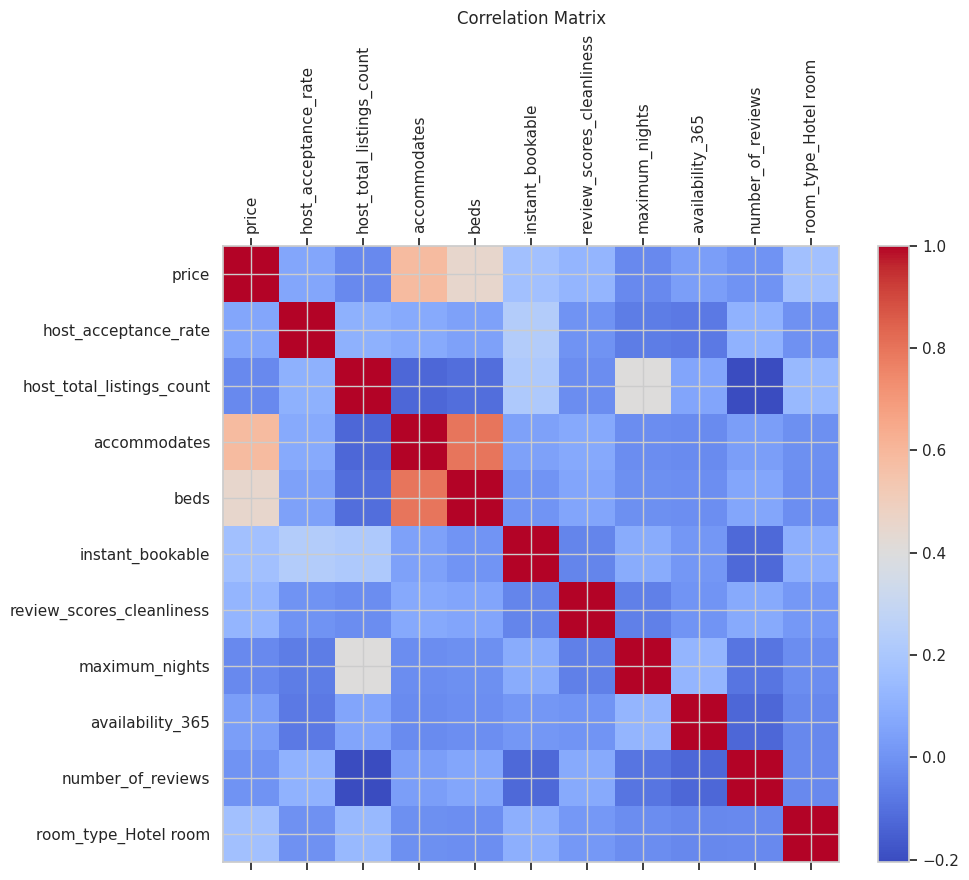

In [ ]:
# Visualizing the correlation matrix of various selected features from the feature selection
# Calculate correlation matrix
correlation_matrix = dataset[features].corr()

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)
# Set ticks and labels
ax.set_xticks(np.arange(len(features)))
ax.set_yticks(np.arange(len(features)))
ax.set_xticklabels(features, rotation=90)
ax.set_yticklabels(features)

plt.title("Correlation Matrix")
plt.show()

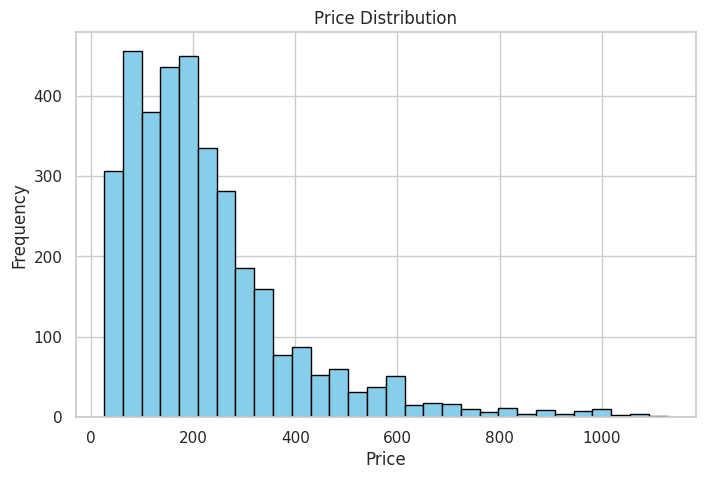

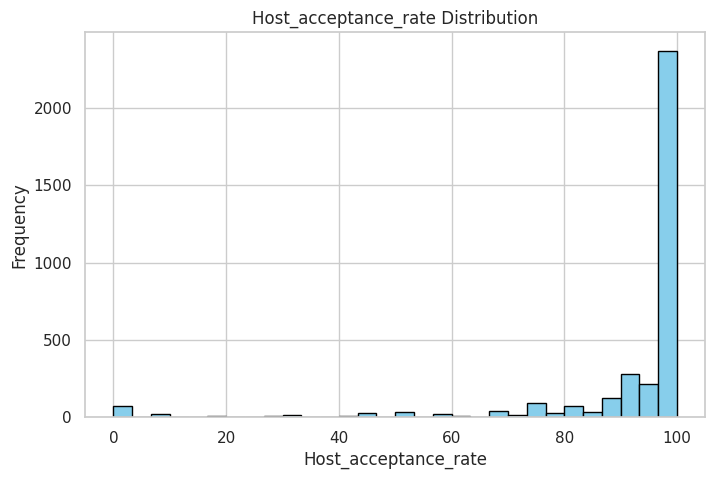

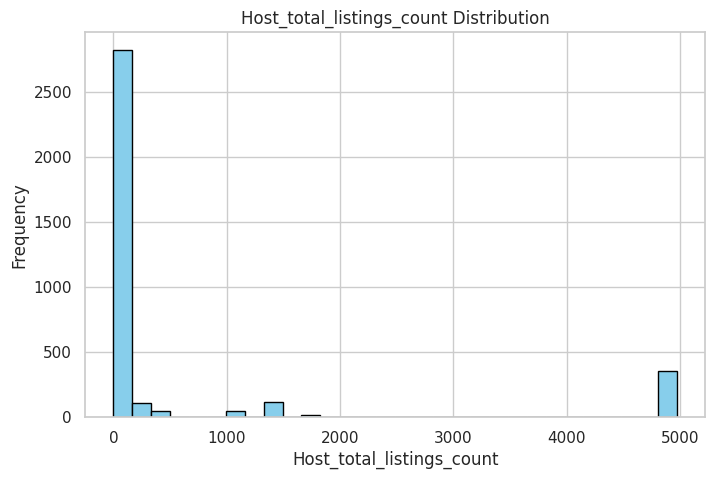

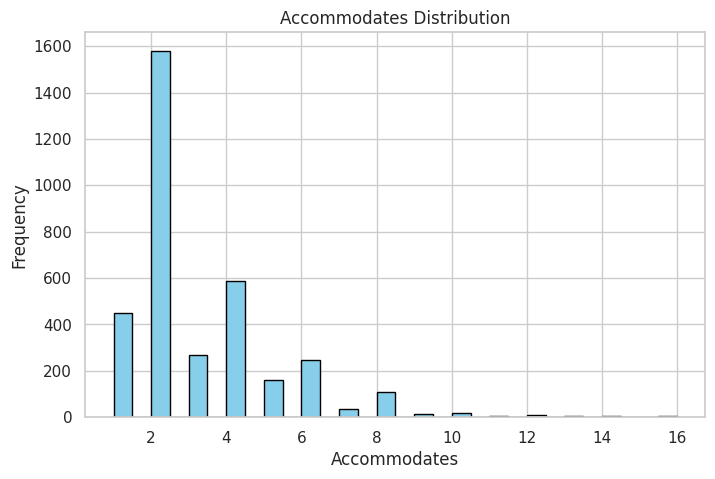

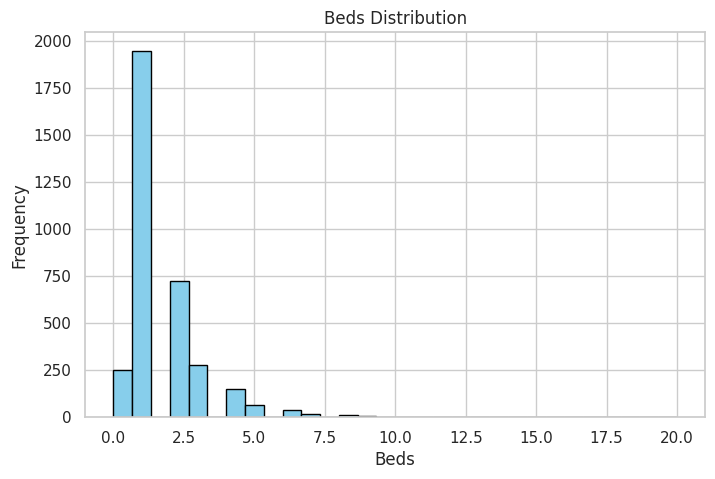

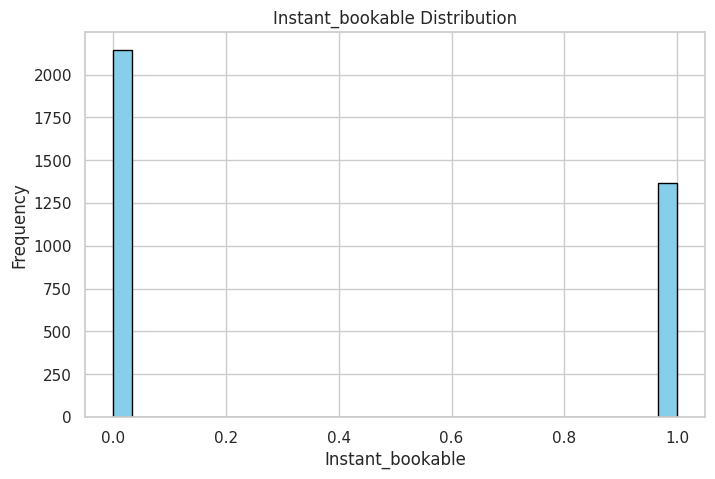

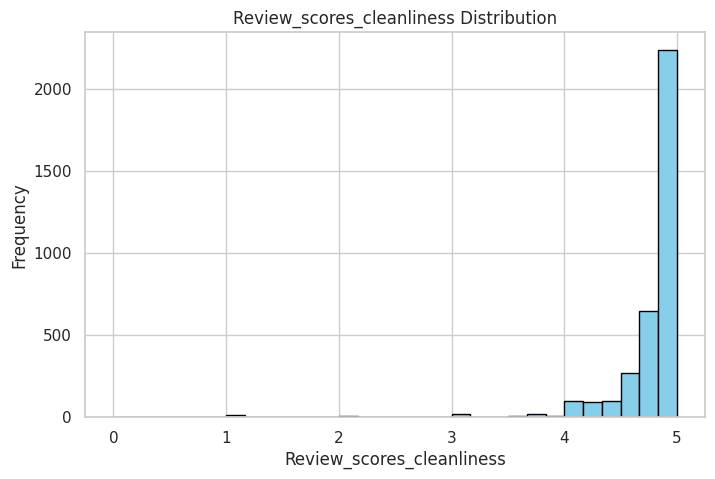

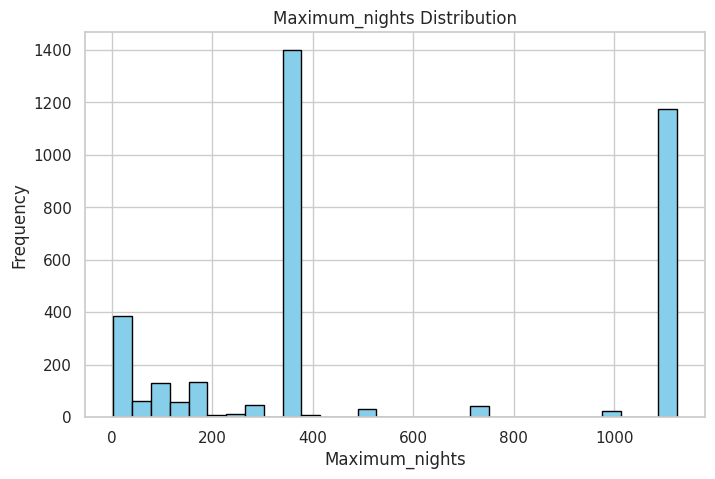

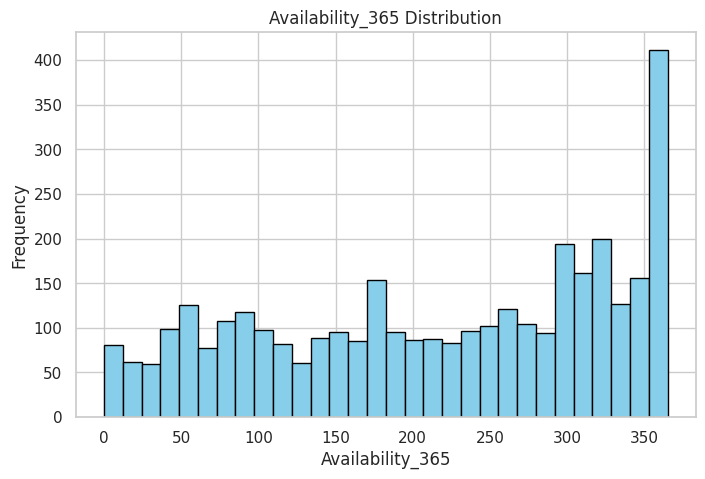

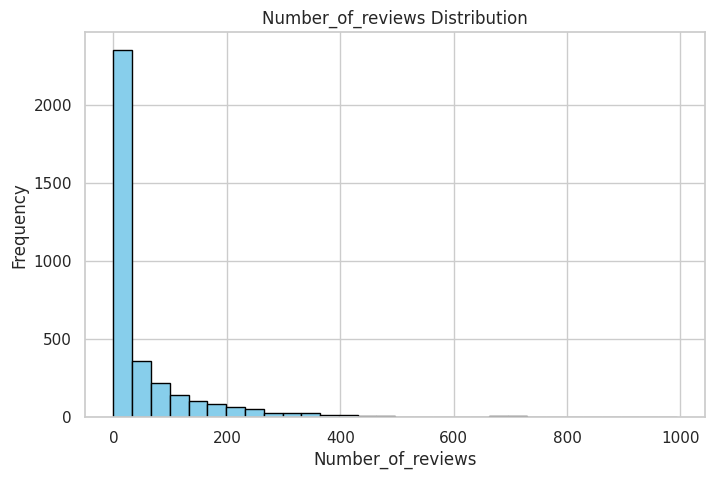

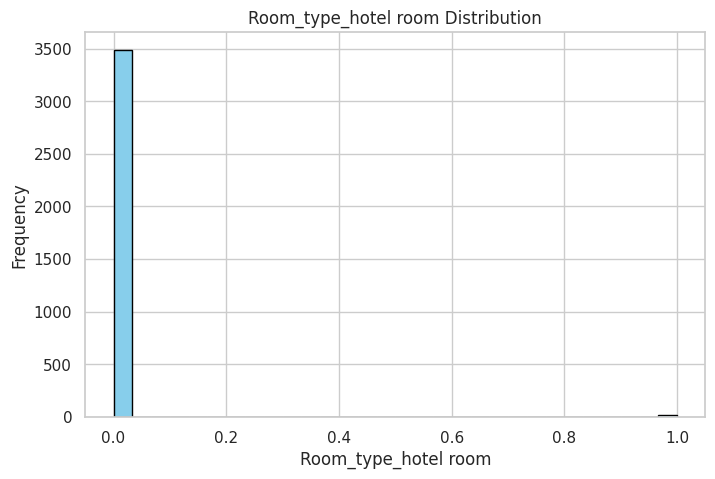

In [ ]:
# Visualizing the histograms of the various numerical features
for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{feature.capitalize()} Distribution')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")
    plt.show()

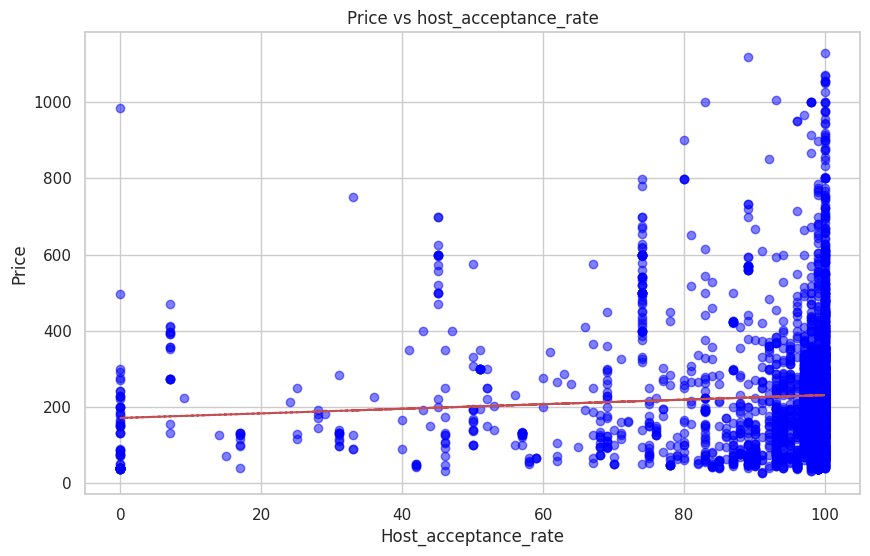

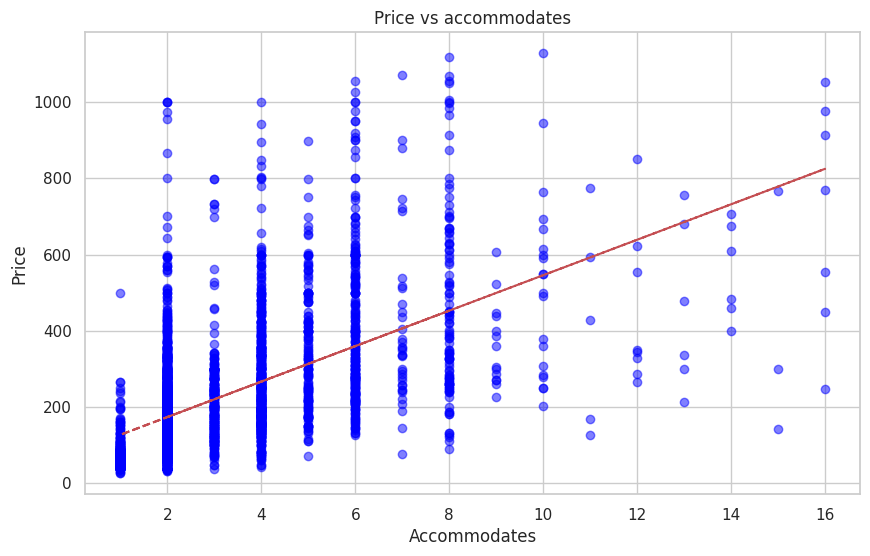

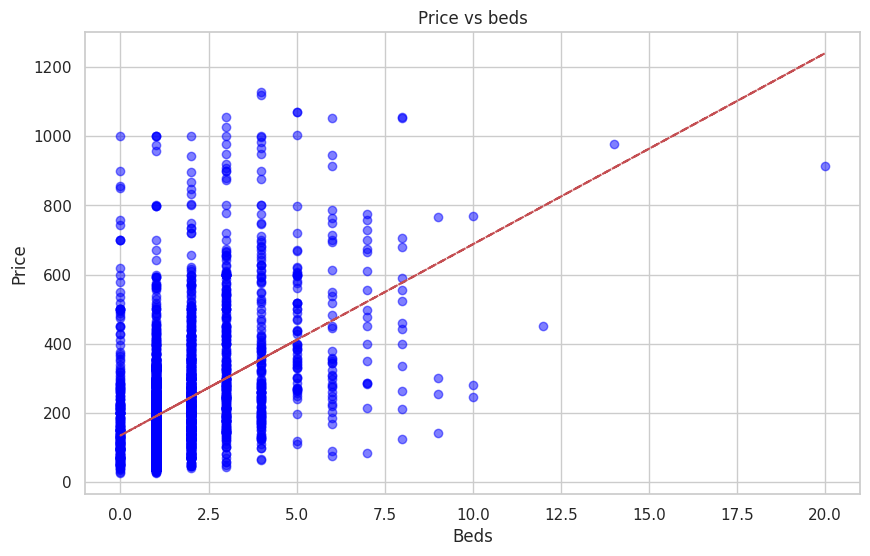

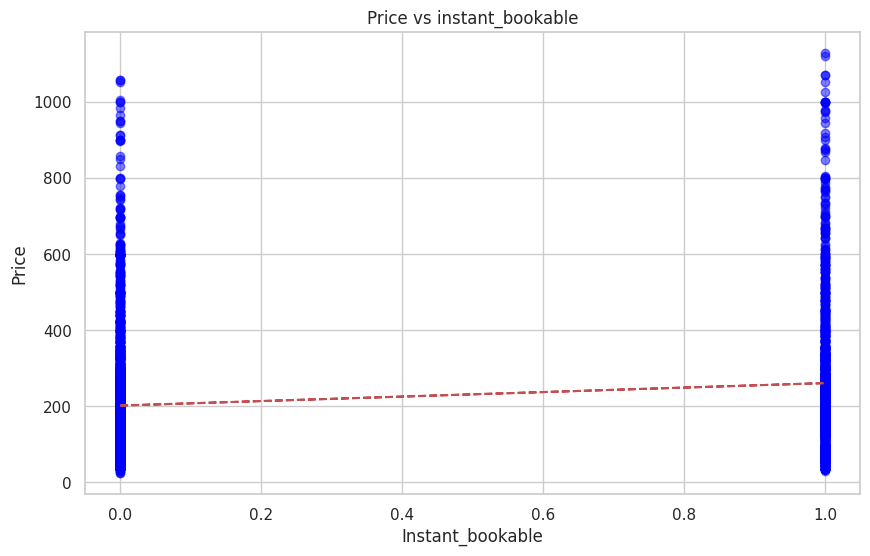

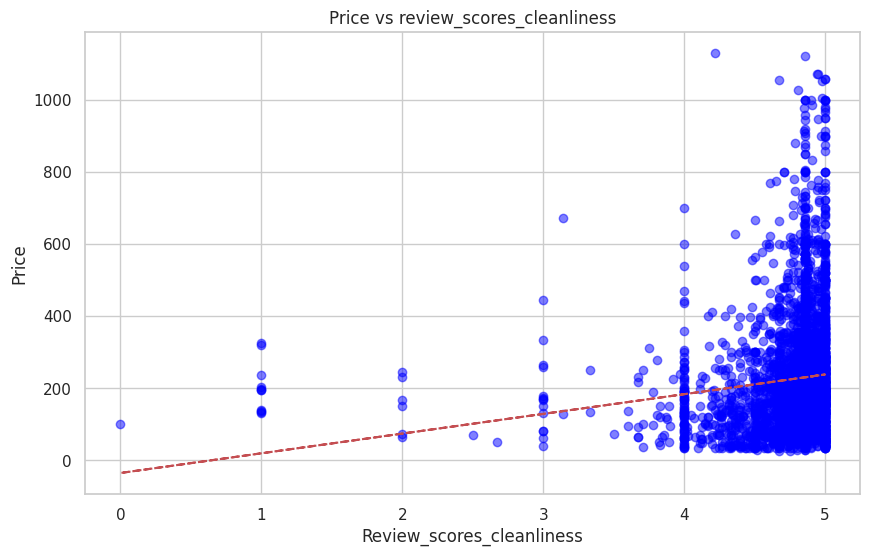

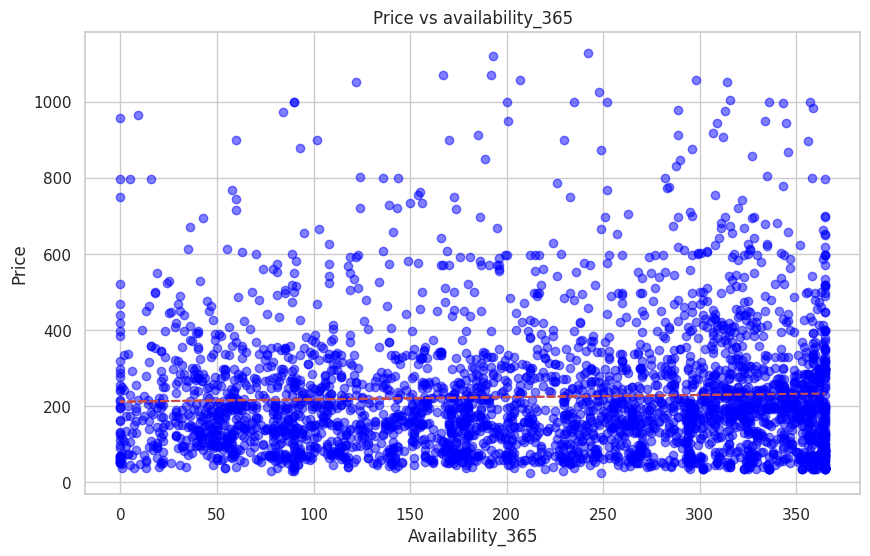

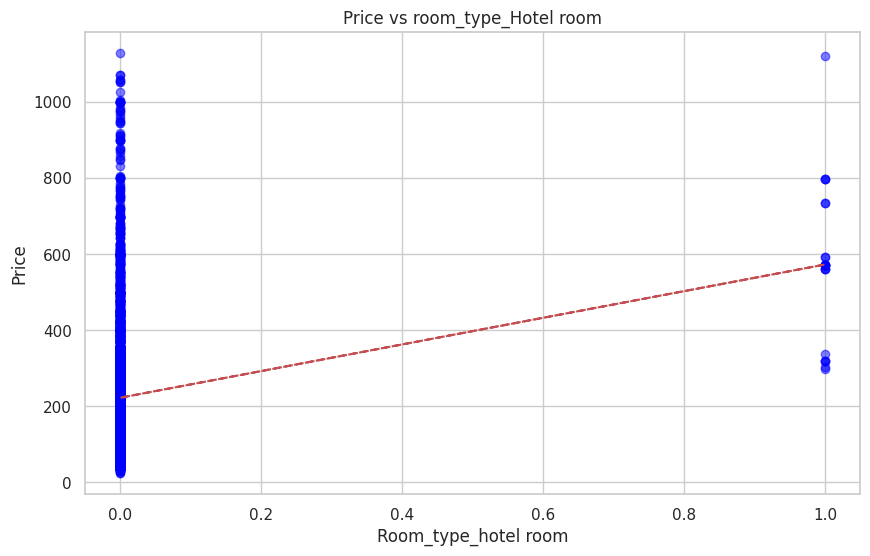

In [ ]:
# Visualizing the relationship and trends between price and various features
for feature in features:
  if feature not in ['price','maximum_nights', 'number_of_reviews', 'host_total_listings_count']:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[feature], dataset['price'], alpha=0.5, color='blue')
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Price")
    x = dataset[feature]
    y = dataset['price']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.show()

# Step 5: Linear Regression Model for Price Prediction

In [ ]:
# select the targe variables and features
features.remove('price')
X = dataset[features]
y = dataset['price']

# Split the data into training and testing sets. Let.s say 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you decide to normalize/scale the features to improve model performance use below code
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model training and evaluation

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# ********Evaluate the model******

# Calculate the Mean Squared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Calculater R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f"R-squared: {r_squared}")

# Model coefficients
print("Model Coefficients (Weights):", model.coef_) # weights
print("Model Intercept (Bias):", model.intercept_) #bias
print(features)

Root Mean Squared Error (RMSE): 127.78054918012074
Mean Absolute Error: 89.12238926281442
R-squared: 0.35325416180626423
Model Coefficients (Weights): [-2.26841768  0.11752013 99.43430868 -2.97205974 23.82422153 14.8401906
 -4.76535674  9.15193357 -0.11900401 29.64066832]
Model Intercept (Bias): 226.6420677361854
['host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'beds', 'instant_bookable', 'review_scores_cleanliness', 'maximum_nights', 'availability_365', 'number_of_reviews', 'room_type_Hotel room']


From the model evaluation, r_sqared value is 0.35, which means the prediction variability is 35.32% demonstrated by the linear regression model presented. The RMSE is also quite high indicating that there can be a difference of 127.78 between predicted price and the actual price.

# Step 6: Random Forest Regression

In [ ]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# ********Evaluate the model******

# Calculate the Mean Squared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Calculater R-squared
r_squared = model_rf.score(X_test_scaled, y_test)
print(f"R-squared: {r_squared}")

print(features)

Root Mean Squared Error (RMSE): 127.78054918012074
Mean Absolute Error: 89.12238926281442
R-squared: 0.5577406695848669
['host_acceptance_rate', 'host_total_listings_count', 'accommodates', 'beds', 'instant_bookable', 'review_scores_cleanliness', 'maximum_nights', 'availability_365', 'number_of_reviews', 'room_type_Hotel room']


# Step 7: XGBoost

Hypertuning the XGBoost parameters to enable improved performance

In [ ]:
# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'alpha': [0, 0.1, 1]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=3)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'alpha': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best score found:  -67.40401763576024


In [ ]:
model_XG = xgb.XGBRegressor(objective='reg:squarederror',
                         colsample_bytree=0.3,
                         learning_rate=0.1,
                         max_depth=7,
                         alpha=0.1,
                         n_estimators=100)

# Train the model
model_XG.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Model Evaluation
y_pred = model_XG.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 62.87279570544207
Root Mean Squared Error: 103.58811159850661


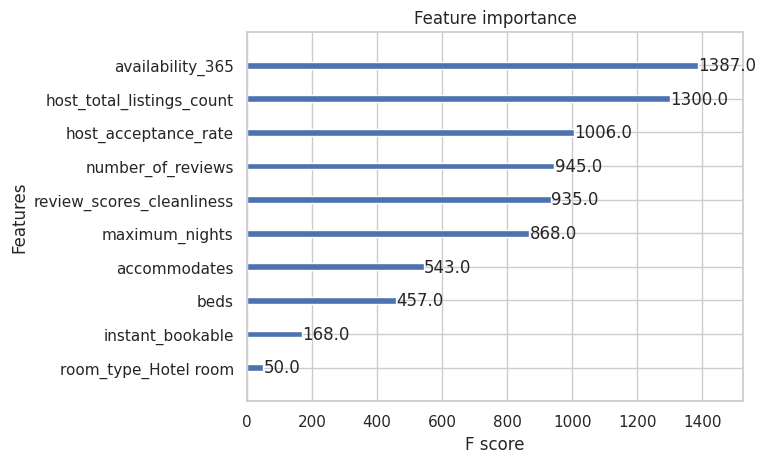

In [ ]:
# Plot feature importance
plot_importance(model_XG, importance_type='weight')  # Options: 'weight', 'gain', 'cover'
plt.show()

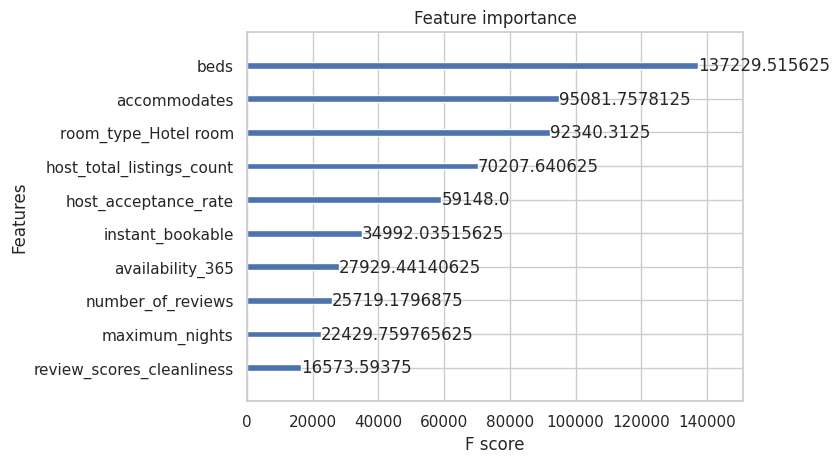

In [ ]:
# Plot feature importance
plot_importance(model_XG, importance_type='gain')  # Options: 'weight', 'gain', 'cover'
plt.show()

# Step 8: Artificial Neural Network

In [ ]:
# Initialize the neural network
model_NN = Sequential()

# Input layer and first hidden layer
model_NN.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model_NN.add(Dropout(0.2))  # Dropout for regularization

# Second hidden layer
model_NN.add(Dense(units=128, activation='relu'))
model_NN.add(Dropout(0.2))

# Output layer
model_NN.add(Dense(units=1))  # Single output for regression (price prediction)

# Compile the model
model_NN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mean_absolute_error'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model Training
history = model_NN.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 170.4179 - mean_absolute_error: 170.4179 - val_loss: 121.1733 - val_mean_absolute_error: 121.1733
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.8475 - mean_absolute_error: 131.8475 - val_loss: 113.5760 - val_mean_absolute_error: 113.5760
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 124.3776 - mean_absolute_error: 124.3776 - val_loss: 113.5985 - val_mean_absolute_error: 113.5985
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 120.0343 - mean_absolute_error: 120.0343 - val_loss: 111.1180 - val_mean_absolute_error: 111.1180
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.9582 - mean_absolute_error: 115.9582 - val_loss: 109.7167 - val_mean_absolute_error: 109.7167
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.9572 - mean_absolute_error: 113.9572 - val_loss: 109.0548 - val_mean_absolute_error: 109.0548
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.16

In [ ]:
# Evaluate the model on the test set
y_pred = model_NN.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_loss, test_mae = model_NN.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f'Root Mean Squared Error: {rmse}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.8934 - mean_absolute_error: 77.8934 
Test Loss (MSE): 79.58747100830078
Test MAE: 79.58747100830078
Root Mean Squared Error: 124.47664379364895


In [ ]:
predictions = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
print(predictions.head())

   Actual   Predicted
0   212.0  150.539078
1   196.0  249.951019
2   196.0  211.110153
3    87.0  106.490410
4   186.0  185.596115


In [ ]:
# Evaluate permutation importance
results = permutation_importance(model_NN, X_test, y_test, scoring='neg_mean_absolute_error')

# Display feature importance
for i in results.importances_mean.argsort()[::-1]:
    print(f"Feature: {X_test.columns[i]}, Importance: {results.importances_mean[i]}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
22/

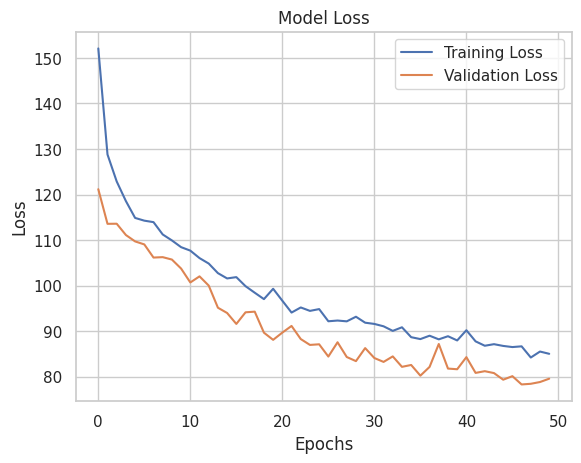

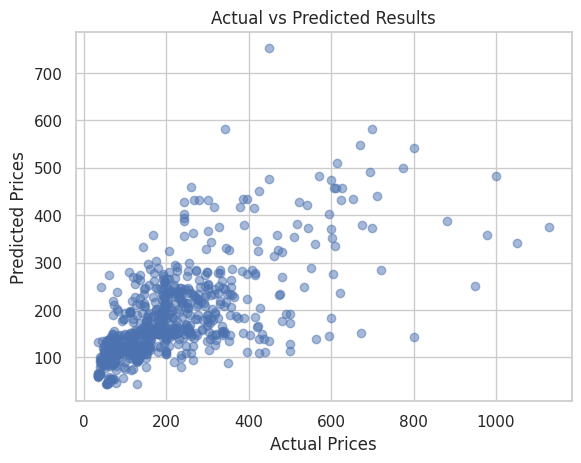

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MAE
plt.scatter(predictions['Actual'], predictions['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Results')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# Step 9: Textual Data Analysis
a. Property type and Room type analysis

1. Analysis of Property Type

['Entire rental unit' 'Entire guest suite' 'Entire condo'
 'Private room in home' 'Private room in rental unit'
 'Private room in townhouse' 'Private room in condo' 'Entire home' 'Boat'
 'Entire loft' 'Private room in bed and breakfast' 'Room in aparthotel'
 'Entire townhouse' 'Shared room in home' 'Entire guesthouse'
 'Entire serviced apartment' 'Private room in guest suite' 'Private room'
 'Entire place' 'Room in boutique hotel' 'Private room in loft'
 'Room in hotel' 'Houseboat' 'Private room in serviced apartment'
 'Shared room in boutique hotel' 'Shared room in rental unit'
 'Private room in casa particular' 'Shared room in condo'
 'Private room in vacation home' 'Shared room in vacation home'
 'Entire vacation home' 'Private room in villa']
property_type
Entire rental unit                    1833
Private room in rental unit            516
Private room in home                   296
Entire condo                           238
Entire home                            129
Entire service

<Axes: xlabel='count'>

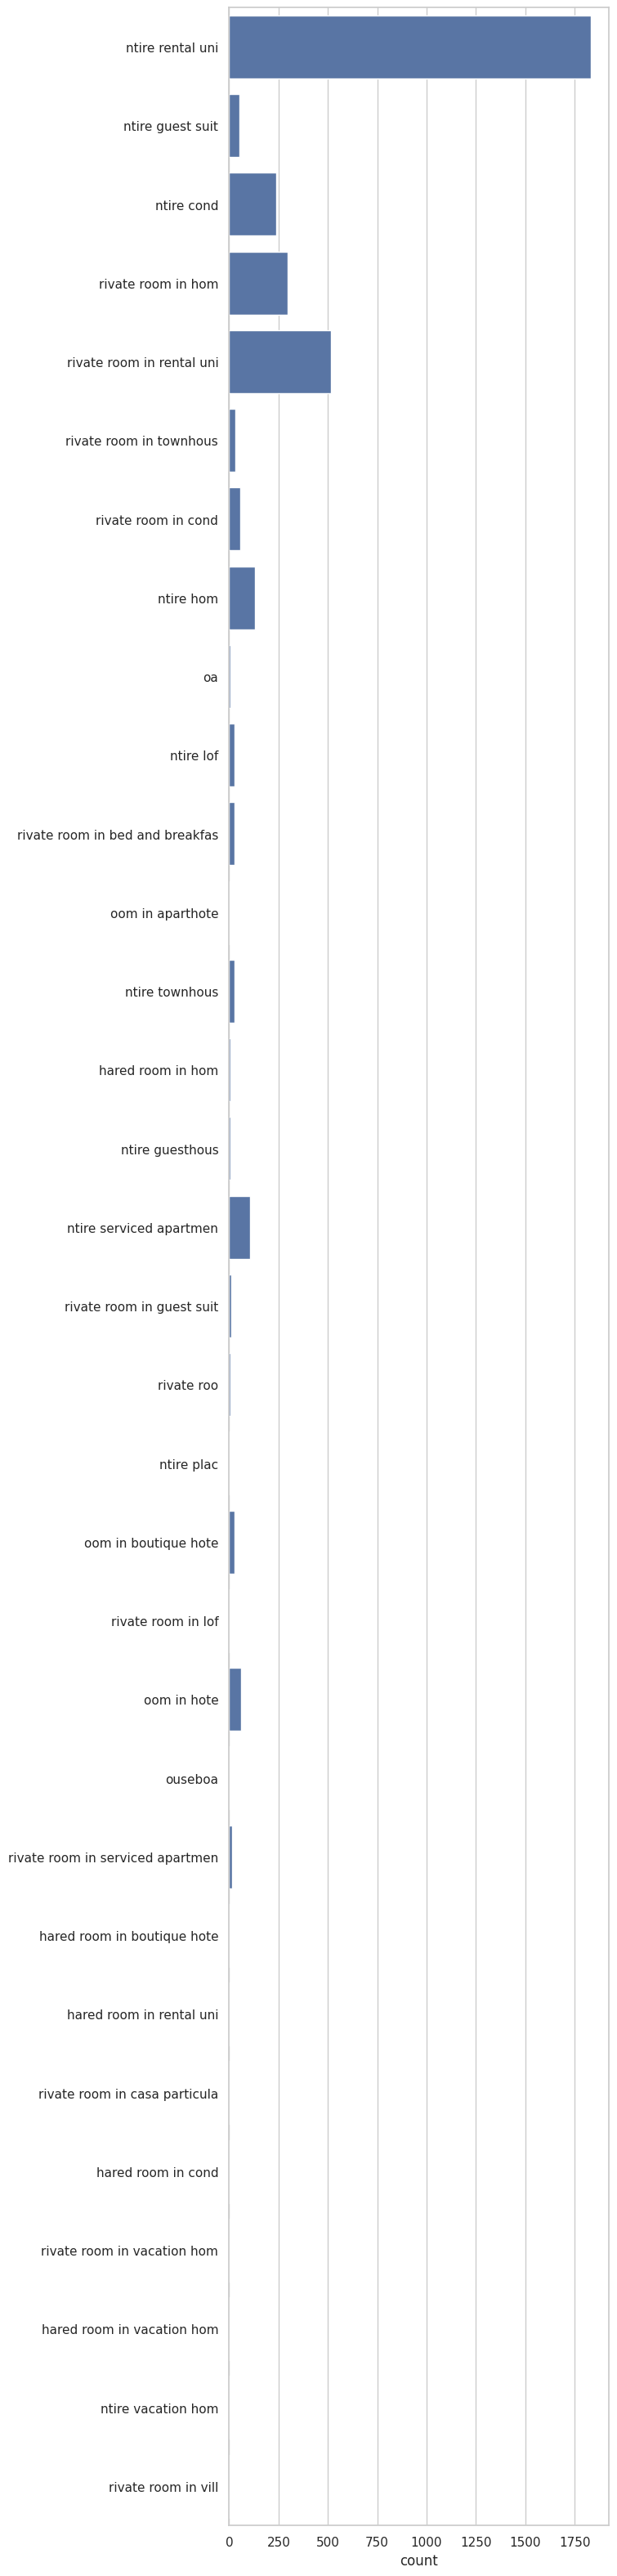

In [ ]:
# Analysing the property_type textual data

print(dataset['property_type'].unique())
# Frequency count
frequency = dataset['property_type'].value_counts()
print(frequency)
amenities = dataset["property_type"].tolist()
l = [[tok.strip() for tok in a.replace("\"", "")[1:-1].split(",") if tok.strip() != ""] for a in amenities]
plt.figure(figsize=(6, 40))
sns.countplot(y=list(itertools.chain(*l)))

In [ ]:
def property_class_df(df):
    property_type_df = pd.DataFrame()
    property_type_df['Rental_unit'] = df.property_type.str.contains("rental", case=False)
    property_type_df['Home'] = df.property_type.str.contains("home", case=False)
    property_type_df['Luxury'] = df.property_type.str.contains("condo" or "townhouse" or "suite" or "guesthouse" or "boat", case=False)
    property_type_df['Hotel'] = df.amenities.str.contains("hotel", case=False)
    property_type_df['B&B'] = df.amenities.str.contains("bed", case=False)
    property_type_df['price'] = df['price']

    return property_type_df


df_property_type = property_class_df(dataset)

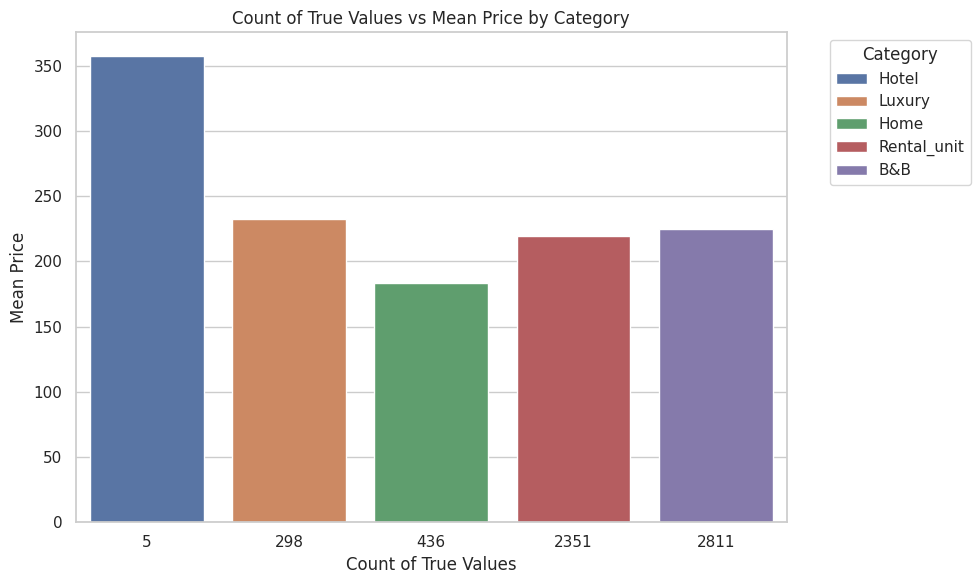

In [ ]:
# Visualize the mean price of different types of properties
summary = []
for column in df_property_type.columns[:-1]:  # Exclude the 'price' column
    true_count = df_property_type[column].sum()  # Count of True values
    mean_price = df_property_type.loc[df_property_type[column], 'price'].mean()  # Mean price for True rows
    summary.append({'Category': column, 'True_Count': true_count, 'Mean_Price': mean_price})

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary)

# Step 2: Plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a bar plot for better visualization
sns.barplot(x="True_Count", y="Mean_Price", hue="Category", data=summary_df)

plt.title("Count of True Values vs Mean Price by Category")
plt.xlabel("Count of True Values")
plt.ylabel("Mean Price")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
X_prop = df_property_type[['Rental_unit','Home', 'Luxury', 'Hotel', 'B&B']]
y_prop = df_property_type['price']

In [ ]:
X_prop_train, X_prop_test, y_prop_train, y_prop_test = train_test_split(X_prop, y_prop, test_size = .25, random_state=42)

lm_model_prop = LinearRegression()
lm_model_prop.fit(X_prop_train, y_prop_train)

y_prop_pred = lm_model_prop.predict(X_prop_test)
# Calculate the Mean Squared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_prop_test, y_prop_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_prop_test, y_prop_pred)}")

# Calculater R-squared
r_squared = lm_model_prop.score(X_prop_test, y_prop_test)
print(f"R-squared: {r_squared}")


Root Mean Squared Error (RMSE): 159.22513792482823
Mean Absolute Error: 112.01394734893863
R-squared: 0.037227360805831444


Mean Absolute Error (MAE): 112.15123157256994
Root Mean Squared Error (RMSE): 159.3619542573441
R-squared: 0.03557209938613404


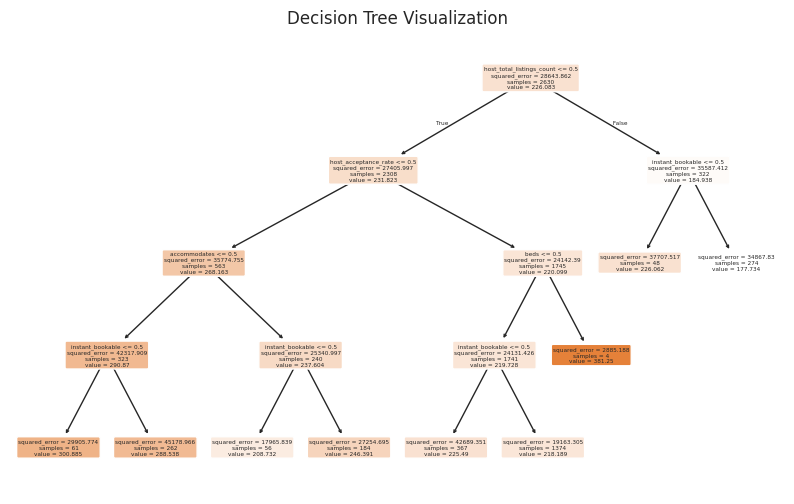

In [ ]:
# Trying Decision tree to see if the results improve

# Step 1: Initialize and fit Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_prop_train, y_prop_train)

# Step 2: Make predictions and evaluate performance
y_prop_pred = model_dt.predict(X_prop_test)

mae = mean_absolute_error(y_prop_test, y_prop_pred)
rmse = np.sqrt(mean_squared_error(y_prop_test, y_prop_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_squared = model_dt.score(X_prop_test, y_prop_test)
print(f"R-squared: {r_squared}")
# Step 3: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model_dt, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


2. Analysis of room type (private, shared etc)

In [ ]:
def room_class_df(df):
    room_type_df = pd.DataFrame()
    room_type_df['Private'] = df.property_type.str.contains("private", case=False)
    room_type_df['Shared'] = df.property_type.str.contains("shared", case=False)
    room_type_df['Entire unit'] = df.property_type.str.contains("Entire" or "boat", case=False)
    room_type_df['price'] = df['price']

    return room_type_df


df_room_type = room_class_df(dataset)

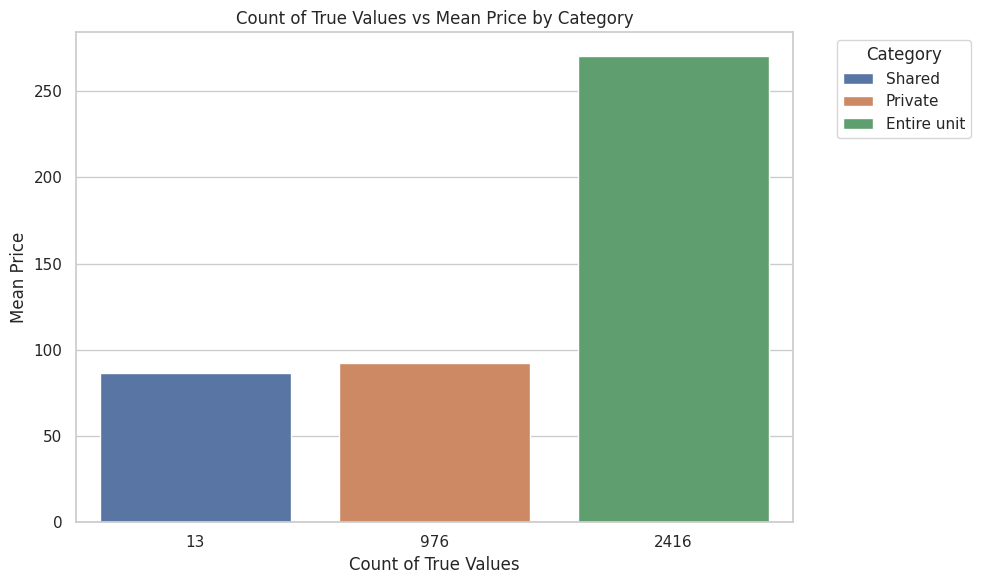

In [ ]:
# Visualize the mean price of different types of room accomodation
summary = []
for column in df_room_type.columns[:-1]:  # Exclude the 'price' column
    true_count = df_room_type[column].sum()  # Count of True values
    mean_price = df_room_type.loc[df_room_type[column], 'price'].mean()  # Mean price for True rows
    summary.append({'Category': column, 'True_Count': true_count, 'Mean_Price': mean_price})

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary)

# Step 2: Plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use a bar plot for better visualization
sns.barplot(x="True_Count", y="Mean_Price", hue="Category", data=summary_df)

plt.title("Count of True Values vs Mean Price by Category")
plt.xlabel("Count of True Values")
plt.ylabel("Mean Price")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
X_room = df_room_type[['Private','Shared', 'Entire unit']]
y_room = df_property_type['price']
X_room_train, X_room_test, y_room_train, y_room_test = train_test_split(X_room, y_room, test_size = .25, random_state=42)

lm_model_room = LinearRegression()
lm_model_room.fit(X_room_train, y_room_train)

y_room_pred = lm_model_room.predict(X_room_test)
# Calculate the Mean Squared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_room_test, y_room_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_room_test, y_room_pred)}")

# Calculater R-squared
r_squared = lm_model_room.score(X_room_test, y_room_test)
print(f"R-squared: {r_squared}")

Root Mean Squared Error (RMSE): 138.75099993177653
Mean Absolute Error: 91.39770534892799
R-squared: 0.26890684897246564


Mean Absolute Error (MAE): 91.39770534892794
Root Mean Squared Error (RMSE): 138.75099993177653
R-squared: 0.26890684897246575


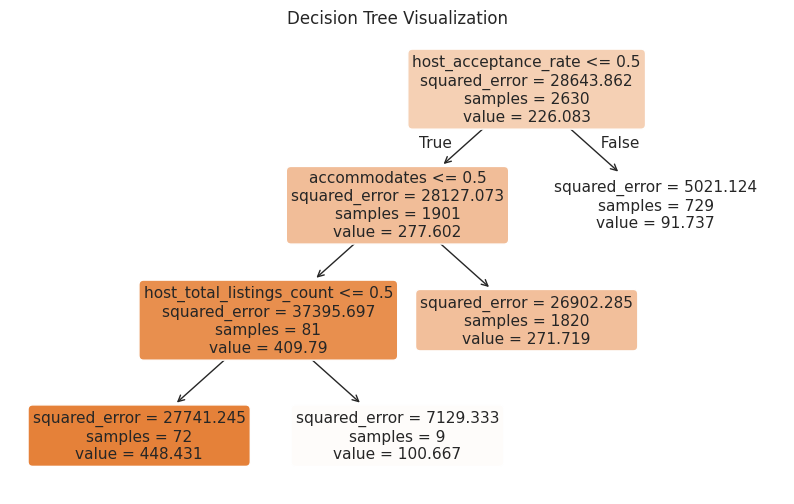

In [ ]:
# Trying Decision tree to see if the results improve

# Step 1: Initialize and fit Decision Tree model
model_dt_room = DecisionTreeRegressor(random_state=42)
model_dt_room.fit(X_room_train, y_room_train)

# Step 2: Make predictions and evaluate performance
y_room_pred = model_dt_room.predict(X_room_test)

mae = mean_absolute_error(y_room_test, y_room_pred)
rmse = np.sqrt(mean_squared_error(y_room_test, y_room_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
r_squared = model_dt_room.score(X_room_test, y_room_test)
print(f"R-squared: {r_squared}")

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model_dt_room, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

Decision tree did not improve the performance. Thus it is evident that the property and room type have non-linear relationship and does have some sort of statistical relationship which is not captured by the decision tree.

 b. Amenties Analysis

In [ ]:
print(dataset['amenities'].unique())

['["Central air conditioning", "Free street parking", "Dishwasher", "Bed linens", "Free parking on premises", "Carbon monoxide alarm", "Coffee maker", "Cooking basics", "Hot water", "Microwave", "Kitchen", "Shampoo", "Essentials", "Hangers", "Oven", "Dryer", "Patio or balcony", "TV with standard cable", "Dishes and silverware", "Extra pillows and blankets", "Smoke alarm", "Wifi", "Refrigerator", "Stove", "Heating", "Hair dryer", "Iron", "Washer"]'
 '["Fire extinguisher", "Free street parking", "Bed linens", "Long term stays allowed", "Carbon monoxide alarm", "Self check-in", "Coffee maker", "Hot water", "Air conditioning", "Bathtub", "Microwave", "Shampoo", "Essentials", "Hangers", "First aid kit", "Dryer", "TV with standard cable", "Dishes and silverware", "Extra pillows and blankets", "Keypad", "Luggage dropoff allowed", "Smoke alarm", "Wifi", "Private entrance", "Refrigerator", "Heating", "Hair dryer", "Iron", "Washer"]'
 '["Fire extinguisher", "Free street parking", "Dishwasher", "

In [ ]:
# Note: Parts of this section was written using ChatGPT
# Step 1: Convert amenities strings to lists
df = dataset.copy()
df['amenities'] =df['amenities'].apply(ast.literal_eval)

# Step 2: Extract unique amenities
unique_amenities = set(amenity for amenities in df['amenities'] for amenity in amenities)
new_df = df[['amenities', 'price']]
# Step 4: Create one-hot encoding for amenities
for amenity in unique_amenities:
    new_df[amenity] = new_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Optional: Add a count of amenities as a new feature
new_df['amenities_count'] = new_df['amenities'].apply(len)

# Drop the original 'amenities' column
new_df = new_df.drop(columns=['amenities'])

# Step 5: Split data into features (X) and target (y)
X = new_df.drop(columns=['price'])
y = new_df['price']

<ipython-input-151-867a541b71d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[amenity] = new_df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-151-867a541b71d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[amenity] = new_df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-151-867a541b71d1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
# Calculater R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Root Mean Squared Error (RMSE): 151.98757801343157
Mean Absolute Error: 99.19374283963538
R-squared: 0.08500160802431034


Feature Importance in Linear Regression:
                                                Feature  Coefficient  \
577                   Folding or convertible high chair   897.385040   
710   32 inch HDTV with standard cable, Amazon Prime...   767.793993   
1138               Private hot tub - available all year   743.119077   
357                                   Sono sound system   717.032637   
590         HDTV with Netflix, Roku, Amazon Prime Video   689.622512   
...                                                 ...          ...   
924                        SONOS Bluetooth sound system     0.000000   
927                      43 inch TV with standard cable     0.000000   
1208                      Gilchrist and Somes body soap     0.000000   
941   65 inch HDTV with Amazon Prime Video, Apple TV...     0.000000   
1177  32 inch HDTV with Amazon Prime Video, Apple TV...     0.000000   

      Importance  
577   897.385040  
710   767.793993  
1138  743.119077  
357   717.032637  

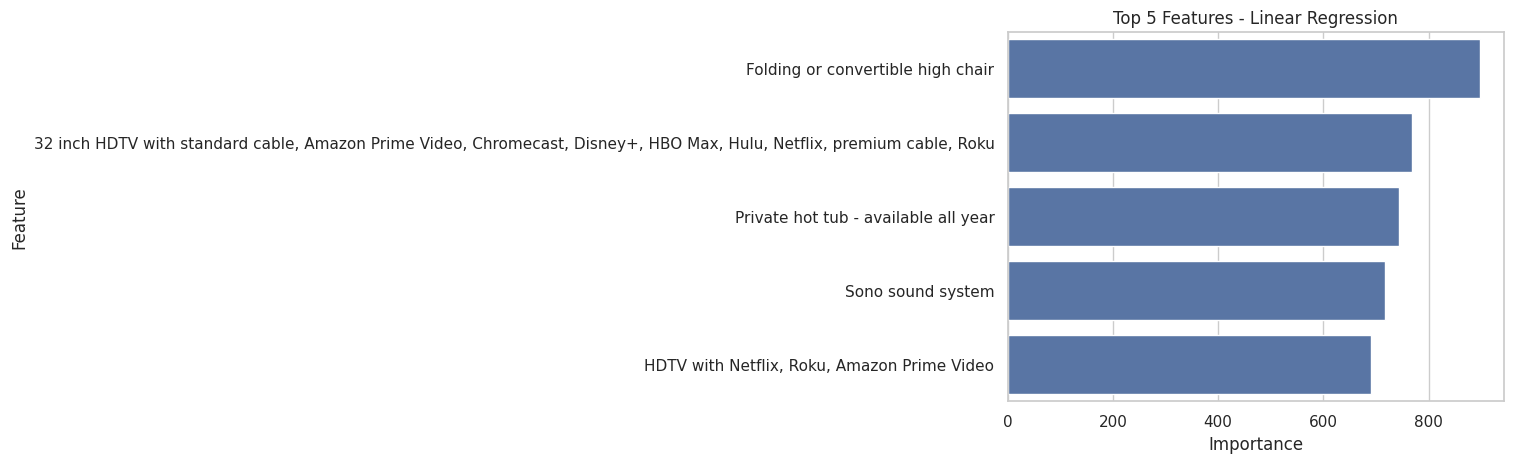

In [ ]:
# Get feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Importance': abs(model.coef_)  # Importance as absolute value of coefficients
}).sort_values(by='Importance', ascending=False)

print("Feature Importance in Linear Regression:")
print(coefficients)
# Visualize Linear Regression feature importance
sns.barplot(x="Importance", y="Feature", data=coefficients.head(5))
plt.title("Top 5 Features - Linear Regression")
plt.show()

In [ ]:
coefficients.head(5)

,Feature,Coefficient,Importance
577,Folding or convertible high chair,897.385040,897.385040
710,"32 inch HDTV with standard cable, Amazon Prime...",767.793993,767.793993
1138,Private hot tub - available all year,743.119077,743.119077
357,Sono sound system,717.032637,717.032637
590,"HDTV with Netflix, Roku, Amazon Prime Video",689.622512,689.622512


In [ ]:
# Using decision tree to see if the performance improves
# Step 6: Train a Decision Tree Model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
# Calculater R-squared
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

Root Mean Squared Error (RMSE): 147.04164038319692
Mean Absolute Error: 80.17915135473896
R-squared: 0.14358390595965675


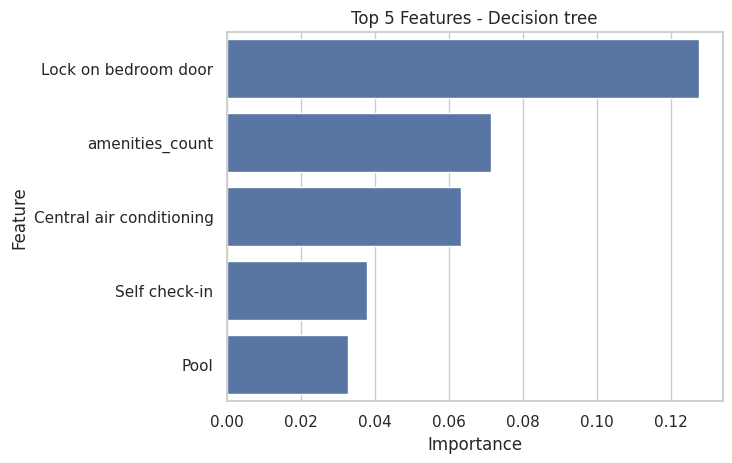

In [ ]:
# Get feature importance (coefficients)
coefficients_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# Visualize Linear Regression feature importance
sns.barplot(x="Importance", y="Feature", data=coefficients_dt.head(5))
plt.title("Top 5 Features - Decision tree")
plt.show()


# Conclusion